# Modern Portfolio Theory

According to MPT, all the investments that are selected are combined together in a way that reduces the risk in the market through the means of diversification and, at the same time, also generates a good return in the long term to the investors

### Portfolio Return
A portfolio consisting of n assets, will have a return given by

$ r_p = \vec{w}^{T} \cdot \vec{r} = \vec{r}^{T} \cdot \vec{w} $

where $ \vec{r} $ is the vector of average annual returns of the assets, and $ \vec{w} $ is the vector of asset weights within the portfolio.

### Portfolio Variance

The portfolio's variance is given by

$ \sigma_p^2 = \vec{w}^{T} \boldsymbol{\Sigma} \vec{w}$

where $ \Sigma $ is the assets' variance-covariance matrix 

### Sharpe Ratio

The Sharpe ratio divides a portfolio's excess returns by a measure of its volatility to assess risk-adjusted performance

$ S = \Large{\frac{r_p - r_f}{\sigma_p}} $

In [113]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Asset Data

1. Set up the parameters:

In [114]:
ASSETS = ['AAPL', 'IBM', 'MSFT', 'META']

START_DATE = '2020-01-01'
END_DATE = '2023-02-14'

prices = yf.download(ASSETS, start=START_DATE, end=END_DATE)

print(prices[:20])

[*********************100%***********************]  4 of 4 completed
            Adj Close                                          Close  \
                 AAPL         IBM        META        MSFT       AAPL   
Date                                                                   
2020-01-02  73.059418  105.346344  209.557648  154.493805  75.087502   
2020-01-03  72.349152  104.506187  208.448837  152.570114  74.357498   
2020-01-06  72.925621  104.319466  212.374680  152.964478  74.949997   
2020-01-07  72.582642  104.389473  212.834183  151.569824  74.597504   
2020-01-08  73.750237  105.260757  214.991898  153.984055  75.797501   
2020-01-09  75.316750  106.373192  218.068634  155.907745  77.407501   
2020-01-10  75.487038  106.334312  217.828873  155.186401  77.582497   
2020-01-13  77.099770  106.264305  221.674805  157.052338  79.239998   
2020-01-14  76.058662  105.657509  218.827820  155.946259  78.169998   
2020-01-15  75.732727  106.279861  220.915604  156.956177  77.83499

### Plot Asset Prices

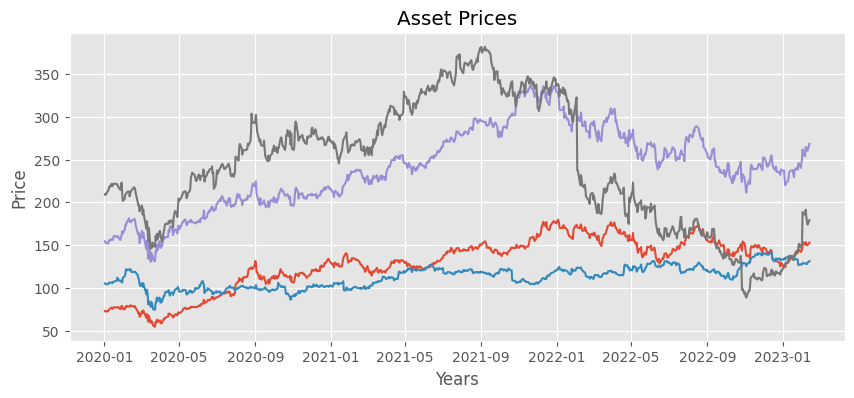

In [115]:
plt.figure(figsize=(10,4))

plt.plot(prices.index, prices[('Adj Close', 'AAPL')])

plt.plot(prices.index, prices[('Adj Close', 'IBM')])

plt.plot(prices.index, prices[('Adj Close', 'MSFT')])

plt.plot(prices.index, prices[('Adj Close', 'META')])

plt.title("Asset Prices")

plt.xlabel("Years")

plt.ylabel("Price")

plt.show()

### Asset Simple Returns

We calcluate simple daily returns $ r = \frac{S_{t+1}}{S_t} -1 $

In [116]:
simple_daily_returns = prices['Adj Close'].pct_change().dropna()

simple_daily_returns[:20]

,AAPL,IBM,META,MSFT
Date,,,,
2020-01-03,-0.009722,-0.007975,-0.005291,-0.012452
2020-01-06,0.007968,-0.001787,0.018834,0.002585
2020-01-07,-0.004703,0.000671,0.002164,-0.009117
2020-01-08,0.016086,0.008346,0.010138,0.015928
2020-01-09,0.021241,0.010568,0.014311,0.012493
2020-01-10,0.002261,-0.000365,-0.001099,-0.004627
2020-01-13,0.021364,-0.000658,0.017656,0.012024
2020-01-14,-0.013503,-0.005710,-0.012843,-0.007043
2020-01-15,-0.004285,0.005890,0.009541,0.006476


### Asset Daily Log Returns

$ R_{d} = ln(\frac{S_{i+1}}{S_{i}}) $

Log-returns (which are additive)

In [117]:
log_daily_returns = np.log(prices['Adj Close'] / prices['Adj Close'].shift(1)).dropna()

log_daily_returns[:10]

,AAPL,IBM,META,MSFT
Date,,,,
2020-01-03,-0.009769,-0.008007,-0.005305,-0.012530
2020-01-06,0.007936,-0.001788,0.018658,0.002581
2020-01-07,-0.004714,0.000671,0.002161,-0.009159
2020-01-08,0.015958,0.008312,0.010087,0.015803
2020-01-09,0.021018,0.010513,0.014210,0.012415
2020-01-10,0.002258,-0.000366,-0.001100,-0.004637
2020-01-13,0.021139,-0.000659,0.017502,0.011952
2020-01-14,-0.013595,-0.005727,-0.012926,-0.007068
2020-01-15,-0.004295,0.005873,0.009496,0.006455


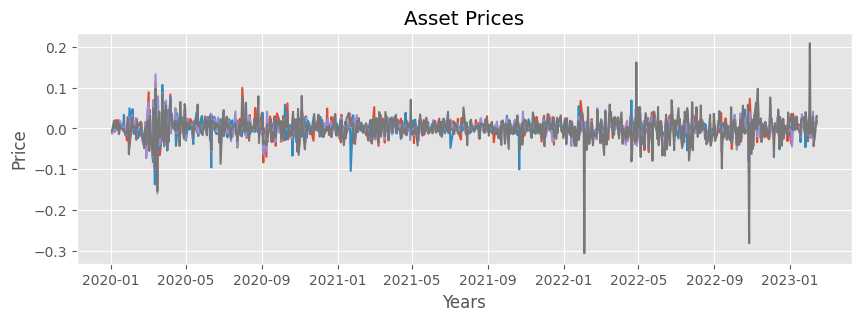

In [118]:
plt.figure(figsize=(10,3))

plt.plot(log_daily_returns.index, log_daily_returns['AAPL'])

plt.plot(log_daily_returns.index, log_daily_returns['IBM'])

plt.plot(log_daily_returns.index, log_daily_returns['MSFT'])

plt.plot(log_daily_returns.index, log_daily_returns['META'])

plt.title("Asset Prices")

plt.xlabel("Years")

plt.ylabel("Price")

plt.show()

### Asset Annual Log Returns

Calculate the annualized average asset returns 

$ \bar{R}_y = \bar{R}_d \times 252 $

$ \bar{R}_d $ = average daily returns, $ \bar{R}_y $ = annual average asset log returns

AAPL    0.237658
IBM     0.070695
META   -0.050231
MSFT    0.177580
dtype: float64


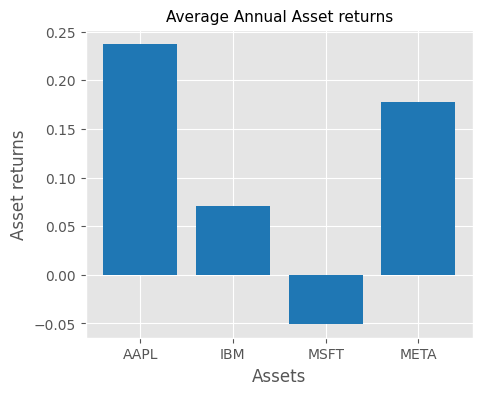

In [119]:
avg_annual_asset_log_returns = log_daily_returns.mean() * 252

print(avg_annual_asset_log_returns)

# plot the average annual asset returns on a bar chart
plt.figure(figsize=(5,4))
plt.bar(ASSETS, avg_annual_asset_log_returns, color='tab:blue')

plt.title('Average Annual Asset returns', fontsize=11)
plt.xlabel('Assets')
plt.ylabel("Asset returns")

plt.show()

## Portfolio of Equally Weighted Assets

Let's create a portfolio with n equally weighted assets

In [120]:
portfolio_weights = len(ASSETS) * [1 / len(ASSETS)]

portfolio_weights

[0.25, 0.25, 0.25, 0.25]

Calculate portfolio returns using $ r_p = \vec{w}^{T} \cdot \vec{r}  =  \vec{r}^{T} \cdot \vec{w} $

In [121]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, log_daily_returns.T), index = log_daily_returns.index)

portfolio_returns[:10]

Date
2020-01-03   -0.008903
2020-01-06    0.006847
2020-01-07   -0.002760
2020-01-08    0.012540
2020-01-09    0.014539
2020-01-10   -0.000961
2020-01-13    0.012484
2020-01-14   -0.009829
2020-01-15    0.004382
2020-01-16    0.010828
dtype: float64

## Portfolios of Random Weights

The number of portfolios we are constructing using our assets, each with different asset weights.

In [122]:
N_PORTFOLIOS = 10**5

Calculate the annualized covariant matrix of the assets

In [123]:
cov_mat = log_daily_returns.cov() * 252

cov_mat

,AAPL,IBM,META,MSFT
AAPL,0.134030,0.050554,0.113776,0.102581
IBM,0.050554,0.091252,0.041944,0.049198
META,0.113776,0.041944,0.261167,0.112292
MSFT,0.102581,0.049198,0.112292,0.121074


Generate random portfolio weights:

In [124]:
np.random.seed(42)

weights = np.random.random(size=(N_PORTFOLIOS, len(ASSETS)))

weights

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       ...,
       [0.59434465, 0.83958621, 0.83204045, 0.12633307],
       [0.68086432, 0.39162364, 0.74418775, 0.75014828],
       [0.27252781, 0.5755887 , 0.89333979, 0.50242265]])

Normalize the asset weights (across each row)

In [125]:
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

weights

array([[0.14102156, 0.35796222, 0.27560979, 0.22540643],
       [0.12620081, 0.1261813 , 0.04698284, 0.70063506],
       [0.2613905 , 0.30790022, 0.00895102, 0.42175826],
       ...,
       [0.24844023, 0.35095292, 0.34779874, 0.05280811],
       [0.26525555, 0.15257129, 0.28992551, 0.29224765],
       [0.12145388, 0.25651504, 0.39812299, 0.22390809]])

### Portfolio Returns

Each of our portfolios generates different returns, volatilities and Sharpe ratios. Let's calculate them.

Calculate each portfolio's return using $ r_p = \vec{w}^{T} \cdot \vec{r} $. 
This is simply the dot product between the weights vector per portfolio and the average annual log return of each asset

In [126]:
portf_annual_returns = np.dot(weights, avg_annual_asset_log_returns)

print(portf_annual_returns)

print(f'portfolio returns mean = {np.mean(portf_annual_returns)}')

print(f'portfolio returns std = {np.std(portf_annual_returns)}')

print(f'portfolio min return = {np.min(portf_annual_returns)}')

print(f'portfolio max return = {np.max(portf_annual_returns)}')

portf_annual_returns.shape

[0.08500457 0.16097152 0.1583347  ... 0.07576194 0.1111602  0.06676229]
portfolio returns mean = 0.10911010069028679
portfolio returns std = 0.03535403065980807
portfolio min return = -0.03710459797493302
portfolio max return = 0.2336852769058798


(100000,)

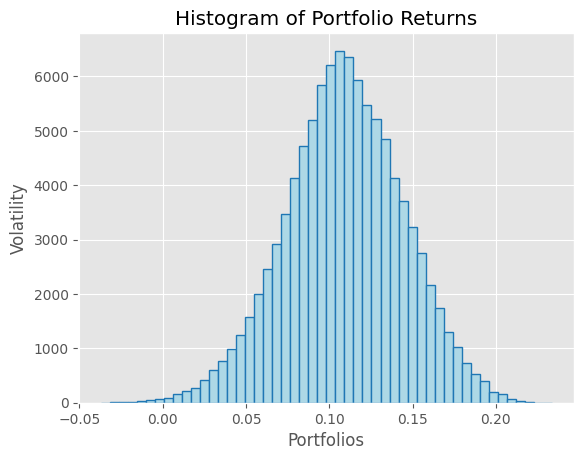

In [127]:
plt.hist(portf_annual_returns, bins=50, color="lightblue", edgecolor='tab:blue', linewidth=1)

plt.title("Histogram of Portfolio Returns")
plt.xlabel("Portfolios")
plt.ylabel("Volatility")
plt.show()

### Portfolio Volatility

Calculate each portfolio's volatility (variance) and store them in an array

The portfolio's variance is given by

$ \sigma_p^2 = \vec{w}^{T} \boldsymbol{\Sigma} \vec{w}$

[0.30163807 0.3182561  0.2907069  ... 0.31432273 0.32934956 0.33078343]
(100000,)
Portfolio volatility mean = 0.31889951455114934
Portfolio volatility min = 0.2734721147267655
Portfolio volatility max = 0.49171421054111425


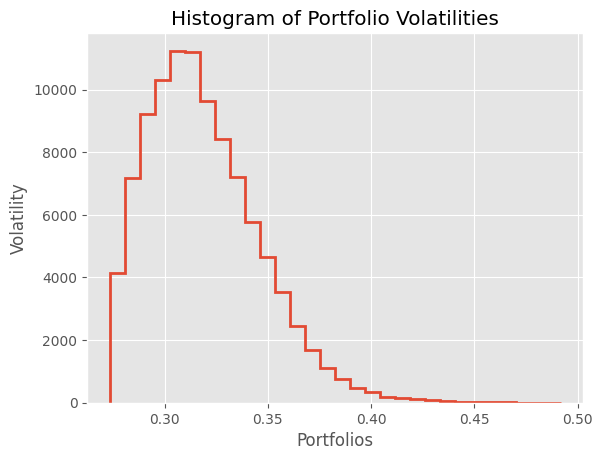

In [128]:
# portfolio volatility
portf_vol = []

# loop over each portfolio weights dataframe row
for i in range(0, len(weights)):

    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

# convert python array to a numpy array
portf_vol = np.array(portf_vol)

print(portf_vol)

print(portf_vol.shape)

print(f'Portfolio volatility mean = {np.mean(portf_vol)}')

print(f'Portfolio volatility min = {np.min(portf_vol)}')
print(f'Portfolio volatility max = {np.max(portf_vol)}')


plt.hist(portf_vol, bins=30, facecolor='none', linewidth=2, fill='false', histtype='step')

plt.title("Histogram of Portfolio Volatilities")
plt.xlabel("Portfolios")
plt.ylabel("Volatility")
plt.show()

### Sharpe Ratio

Calculate each portfolio's Sharpe ratio

$ S = \Large{\frac{r_p - r_f}{\sigma_p}} $

[0.28180981 0.5057924  0.5446541  ... 0.24103234 0.33751435 0.20183081]
(100000,)
portfolio min Sharpe Ratio = -0.07634259550380283
portfolio max Sharpe Ratio = 0.6409728558087908


Text(0, 0.5, 'Sharpe Ratio')

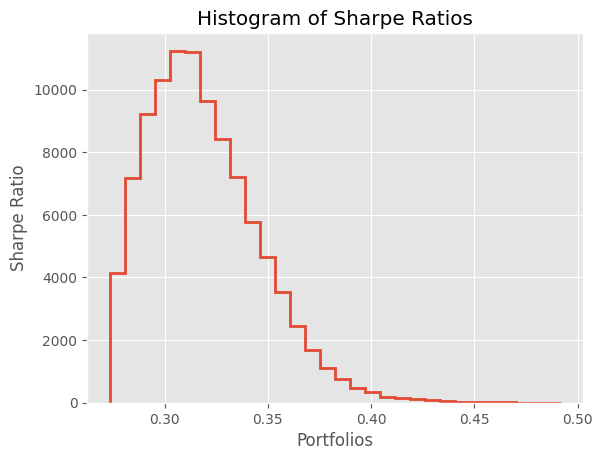

In [129]:
# Portfolio Sharpe Ratio
portf_sharpe_ratio = portf_annual_returns / portf_vol

print(portf_sharpe_ratio)

print(portf_sharpe_ratio.shape)

print(f'portfolio min Sharpe Ratio = {np.min(portf_sharpe_ratio)}')
print(f'portfolio max Sharpe Ratio = {np.max(portf_sharpe_ratio)}')

plt.hist(portf_vol, bins=30, facecolor='none', linewidth=2, fill='false', histtype='step')

plt.title("Histogram of Sharpe Ratios")
plt.xlabel("Portfolios")
plt.ylabel("Sharpe Ratio")

### Dataframe of Weights, Returns, Volatility, Sharpe Ratio

Create a joint DataFrame with all calculations for each portfolio (returns, volatility, Sharpe ratio)

In [130]:
portf_results = pd.DataFrame({'returns': portf_annual_returns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})

portf_results["weights"] = weights.tolist()

portf_results

,returns,volatility,sharpe_ratio,weights
0,0.085005,0.301638,0.281810,"[0.1410215567872302, 0.3579622176722185, 0.275..."
1,0.160972,0.318256,0.505792,"[0.12620080734580005, 0.12618129700478345, 0.0..."
2,0.158335,0.290707,0.544654,"[0.26139050028350513, 0.3079002216404562, 0.00..."
3,0.167576,0.323370,0.518217,"[0.5903801501374071, 0.15059391470113248, 0.12..."
4,0.089824,0.304277,0.295205,"[0.1960105449641472, 0.33807860847040766, 0.27..."
...,...,...,...,...
99995,0.045970,0.304096,0.151170,"[0.06683273200195133, 0.4997240490146959, 0.36..."
99996,0.151374,0.324481,0.466512,"[0.2643887156324053, 0.09519411080332144, 0.14..."
99997,0.075762,0.314323,0.241032,"[0.24844023015523045, 0.35095292013518037, 0.3..."
99998,0.111160,0.329350,0.337514,"[0.26525555418396335, 0.1525712866702515, 0.28..."


Let's plot these portfolio results on a return/volatility graph where the Sharpe ratios represent the heatmap

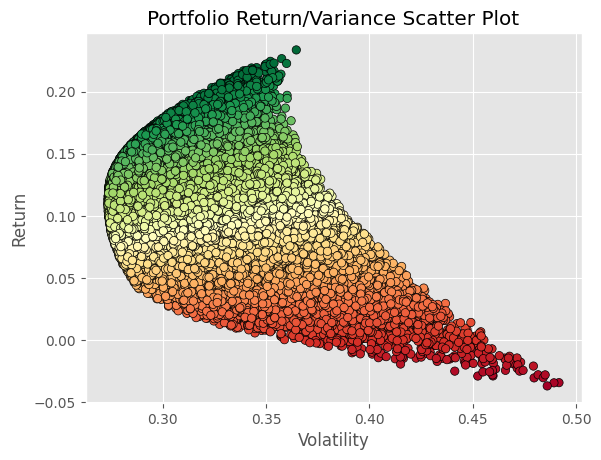

In [131]:
plt.scatter(x = portf_results['volatility'], 
            y = portf_results['returns'],
            c = portf_results['sharpe_ratio'],
            cmap = 'RdYlGn',
            edgecolors='black')

plt.title('Portfolio Return/Variance Scatter Plot')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.show()

## Efficient Frontier

Locate the points creating the Efficient Frontier. This is done by scanning the returns on the returns axis, by creating a linspace, then selecting all the portfolios that (approximatley) have that return, finally selecting the portfolio with the minimum volatility.

In [132]:
# number of points on the efficient frontier
N_POINTS = 150

# efficient frontier volatility
portf_vol_ef = []

# linpsace from min portfolio return to max portfolio return
portf_rtns_ef = np.linspace(portf_results.returns.min(), portf_results.returns.max(), N_POINTS)

# round the efficient frontier returns
portf_rtns_ef = np.round(portf_rtns_ef, 2)

indices_to_skip = []

# round off the portfolio returns
portf_rtns = np.round(portf_annual_returns, 2)

# loop over the N_POINTS defined above (from min portfolio return to max portfolio return)
for point_index in range(N_POINTS):
    
    # if the portfolio efficient frontier return is not in the portfolio returns
    if portf_rtns_ef[point_index] not in portf_rtns:
        
        # add to skipped index list
        indices_to_skip.append(point_index)
        
        # skip to next for loop index
        continue
    
    # if portf_rtns_ef is found in portf_rtns
    # get the index in portf_rtns   
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    
    # get the minimum portfolio volatility within that index 
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

print(portf_rtns_ef[:10])
print(portf_vol_ef[:10])

[-0.04 -0.04 -0.03 -0.03 -0.03 -0.03 -0.03 -0.02 -0.02 -0.02]
[0.4860274625203794, 0.4860274625203794, 0.4412726384120296, 0.4412726384120296, 0.4412726384120296, 0.4412726384120296, 0.4412726384120296, 0.4124405001457694, 0.4124405001457694, 0.4124405001457694]


Plot the efficient frontier

Text(0, 0.5, 'Return')

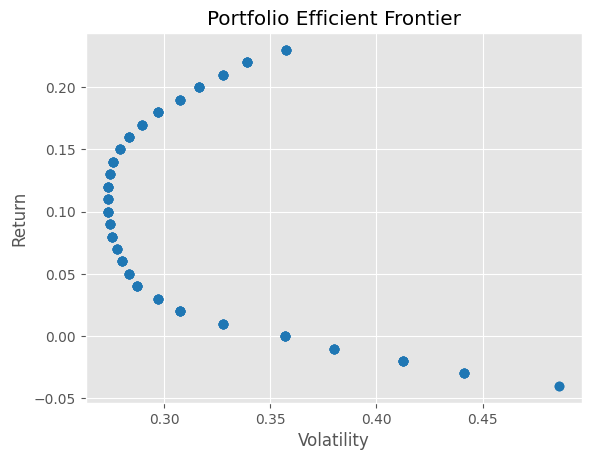

In [133]:
plt.plot(portf_vol_ef, portf_rtns_ef, color='tab:blue', marker='o' , linestyle='')

plt.title('Portfolio Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')

Create a combined plot

In [134]:
portf_vol_ef[:10]

[0.4860274625203794,
 0.4860274625203794,
 0.4412726384120296,
 0.4412726384120296,
 0.4412726384120296,
 0.4412726384120296,
 0.4412726384120296,
 0.4124405001457694,
 0.4124405001457694,
 0.4124405001457694]

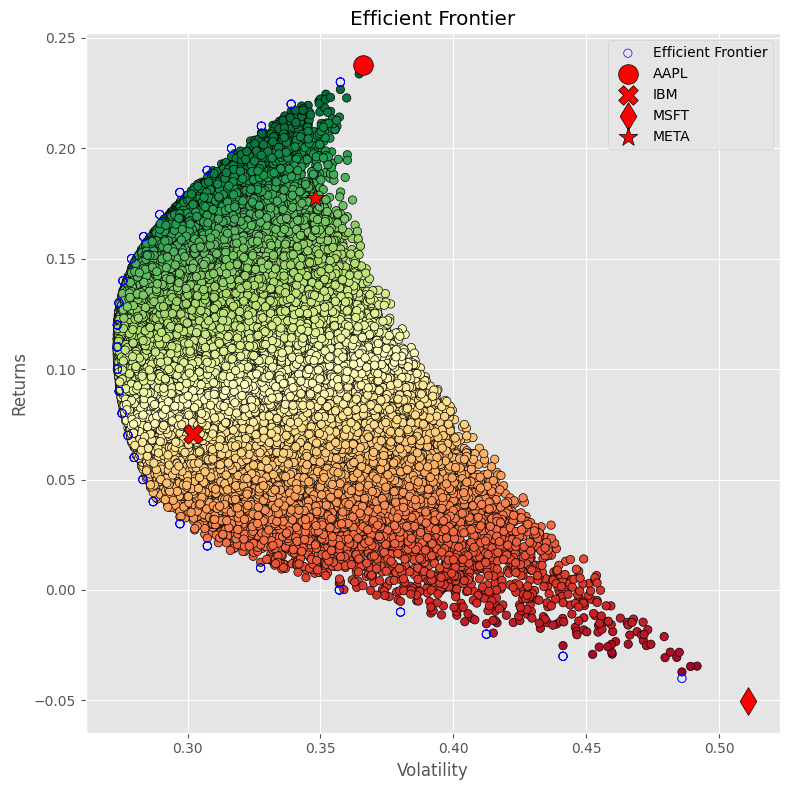

In [135]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots(figsize=(8, 8))

ax.set(xlabel = 'Volatility', ylabel = 'Returns', title = 'Efficient Frontier')

# 1. Scatter plot all the portfolios on the graph 
ax.scatter(x = portf_results['volatility'], 
           y = portf_results['returns'],
           c = portf_results['sharpe_ratio'],
           cmap = 'RdYlGn',
           edgecolors='black')


# 2. Plot efficient frontier as a blue dashed curve
ax.scatter(x=portf_vol_ef, 
           y=portf_rtns_ef, 
           facecolors='none', 
           edgecolors='b',
           label = "Efficient Frontier")


# 3. Scatter plot each individual asset
for asset_index in range(len(ASSETS)):
    
    ax.scatter(x = np.sqrt(cov_mat.iloc[asset_index, asset_index]), # asset volatility
               y = avg_annual_asset_log_returns[asset_index],       # asset return
               marker = MARKS[asset_index],
               s = 200,
               color = 'red',
               edgecolors='black',
               label = ASSETS[asset_index])
    
ax.legend()

plt.tight_layout()

plt.show()

### Finding the Maximum Sharpe Ratio

Select the maximum Sharpe ratio directly from the list **portf_results.sharpe_ratio** along with the return and volatility of that portfolio

In [136]:
# We can evaluate the maximum Sharpe ratio using np.max(portf_results.sharpe_ratio)
# However, to evaluate the return and volatility we need to get the index of the max Sharpe
max_sharpe_ind = np.argmax(portf_results.sharpe_ratio)

# now get the max Sharpe portfolio
max_sharpe_portf = portf_results.loc[max_sharpe_ind]

max_sharpe_portf

returns                                                  0.233685
volatility                                               0.364579
sharpe_ratio                                             0.640973
weights         [0.9833027689203634, 0.003319101014830604, 0.0...
Name: 91371, dtype: object

In [137]:
# Get the weights of this portfolio

for x, y in zip(ASSETS, weights[np.argmax(portf_results.sharpe_ratio)]):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

AAPL: 98.33% IBM: 0.33% MSFT: 1.15% META: 0.19% 

### Finding the Minimum Volatility Portfolio

This will be the portfolio on the left-most part of the return/volatility plot

In [138]:
# We can evaluate the minimum volatility using np.min(portf_results.volatility)
# However, to evaluate the return and Sharpe ratio of the portfolio, we need the index

min_vol_ind = np.argmin(portf_results.volatility)

min_vol_portf = portf_results.loc[min_vol_ind]

min_vol_portf

returns                                                   0.10945
volatility                                               0.273472
sharpe_ratio                                             0.400225
weights         [0.11192146282288912, 0.6209426992947242, 0.03...
Name: 65623, dtype: object

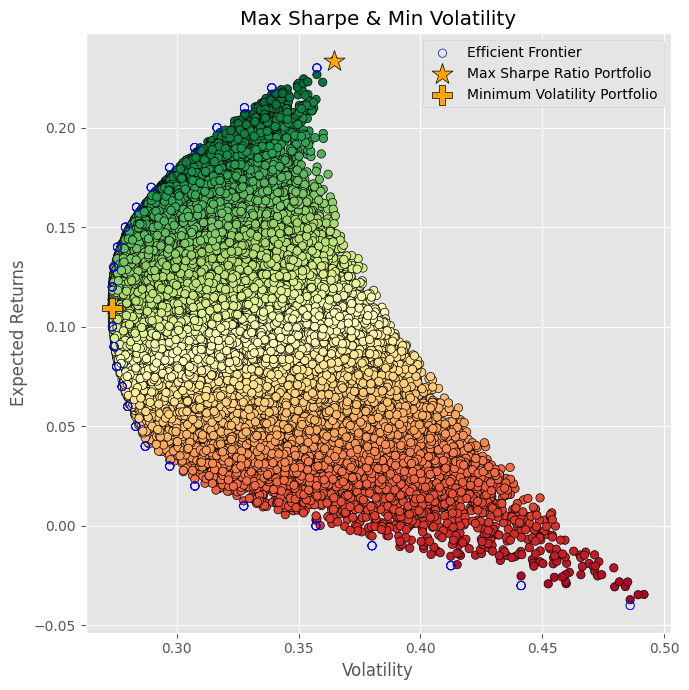

In [139]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots(figsize=(7, 7))

ax.set(xlabel = 'Volatility', ylabel = 'Returns', title = 'Efficient Frontier')

# 1. Scatter plot all the portfolios on the graph 
ax.scatter(x = portf_results['volatility'], 
           y = portf_results['returns'],
           c = portf_results['sharpe_ratio'],
           cmap = 'RdYlGn',
           edgecolors='black')

# 2. Plot efficient frontier as a blue dashed curve
ax.scatter(x = portf_vol_ef, 
           y = portf_rtns_ef, 
           facecolors ='none', 
           edgecolors ='b',
           label = "Efficient Frontier")

# 3. Max Sharep Ratio    
ax.scatter(x = max_sharpe_portf.volatility, 
           y = max_sharpe_portf.returns, 
           color = 'orange', 
           edgecolors='black', 
           marker = '*', 
           s = 250, 
           label = 'Max Sharpe Ratio Portfolio')

# 4. Minimum Volatility
ax.scatter(x = min_vol_portf.volatility, 
           y = min_vol_portf.returns, 
           color = 'orange',   
           edgecolors = 'black', 
           marker = 'P', 
           s = 200, 
           label = 'Minimum Volatility Portfolio')

ax.set(xlabel = 'Volatility', ylabel = 'Expected Returns', title = 'Max Sharpe & Min Volatility')

ax.legend()

plt.tight_layout()

plt.show()

## Finding the Efficient Frontier using SciPy optimization

We start by defining two functions, the first one is used to calculate a portf portfolio returns and the second returns the portfolio volatility

$ r_p = \vec{r}^{T} \cdot \vec{w} $

and

$ \sigma_p^2 = \vec{w}^{T} \boldsymbol{\Sigma} \vec{w}$

In [140]:
# function calculates a portfolio's return
def get_portf_rtn(weights, ret):
    
    return np.dot(weights, ret)
    
# Calculates portfolio volatility
def get_portf_vol(weights, avg_retns, cov_mat):
    
    return np.sqrt(np.dot(weights, np.dot(cov_mat, weights)))

Define the function calculating the efficient frontier:

In [141]:
avg_annual_asset_log_returns

AAPL    0.237658
IBM     0.070695
META   -0.050231
MSFT    0.177580
dtype: float64

In [142]:
def get_efficient_frontier(avg_annual_asset_log_returns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_annual_asset_log_returns)
    
    args = (avg_annual_asset_log_returns, cov_mat)
    
    bounds = tuple((0,1) for asset in range(n_assets))
    
    initial_weights_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        
        constraints = ({'type': 'eq', 'fun': lambda x: get_portf_rtn(x, avg_annual_asset_log_returns) - ret}, 
                       {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        
        efficient_portfolio = sco.minimize(get_portf_vol, 
                                           initial_weights_guess, 
                                           args=args, 
                                           method='SLSQP', 
                                           constraints=constraints, 
                                           bounds=bounds)
        
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

In [156]:
print(avg_annual_asset_log_returns)
print(cov_mat)
print(rtns_range)

AAPL    0.237658
IBM     0.070695
META   -0.050231
MSFT    0.177580
dtype: float64
          AAPL       IBM      META      MSFT
AAPL  0.134030  0.050554  0.113776  0.102581
IBM   0.050554  0.091252  0.041944  0.049198
META  0.113776  0.041944  0.261167  0.112292
MSFT  0.102581  0.049198  0.112292  0.121074
[-2.20000000e-01 -2.17286432e-01 -2.14572864e-01 -2.11859296e-01
 -2.09145729e-01 -2.06432161e-01 -2.03718593e-01 -2.01005025e-01
 -1.98291457e-01 -1.95577889e-01 -1.92864322e-01 -1.90150754e-01
 -1.87437186e-01 -1.84723618e-01 -1.82010050e-01 -1.79296482e-01
 -1.76582915e-01 -1.73869347e-01 -1.71155779e-01 -1.68442211e-01
 -1.65728643e-01 -1.63015075e-01 -1.60301508e-01 -1.57587940e-01
 -1.54874372e-01 -1.52160804e-01 -1.49447236e-01 -1.46733668e-01
 -1.44020101e-01 -1.41306533e-01 -1.38592965e-01 -1.35879397e-01
 -1.33165829e-01 -1.30452261e-01 -1.27738693e-01 -1.25025126e-01
 -1.22311558e-01 -1.19597990e-01 -1.16884422e-01 -1.14170854e-01
 -1.11457286e-01 -1.08743719e-01 -1.060301

Define the a range of returns

In [155]:
rtns_range = np.linspace(-0.22, 0.32, 200)

Calculate the Efficient Frontier

In [144]:
efficient_portfolios = get_efficient_frontier(avg_annual_asset_log_returns, cov_mat, rtns_range)

Extract the volatilities of the efficient portfolios:

In [145]:
vols_range = [x['fun'] for x in efficient_portfolios]

Plot the calculated Efficient Frontier, together with the simulated portfolios:

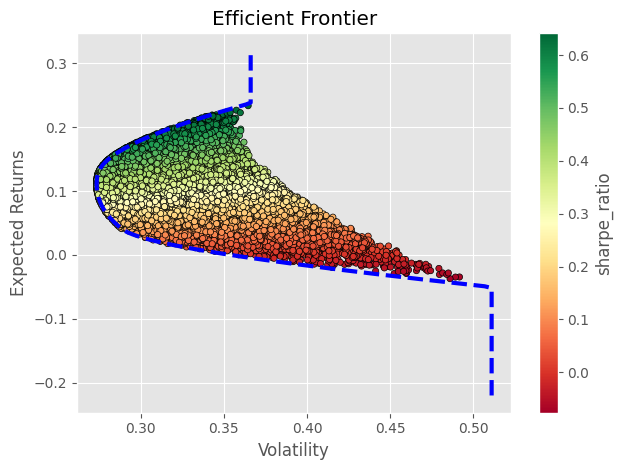

In [146]:
fig, ax = plt.subplots()

portf_results.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)

ax.plot(vols_range, rtns_range, 'b--', linewidth=3)

ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')

plt.tight_layout()

plt.show()

#### Portfolio of Minimum Volatility

In [147]:
min_vol_ind = np.argmin(vols_range)

min_vol_portf_rtn = rtns_range[min_vol_ind]

min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn, 'Volatility': min_vol_portf_vol, 
                 'Sharpe Ratio': (min_vol_portf_rtn / min_vol_portf_vol)}

min_vol_portf

{'Return': 0.11105527638190957,
 'Volatility': 0.2734501867371664,
 'Sharpe Ratio': 0.40612616764695486}

Print performance summary

In [148]:
print('Minimum Volatility portfolio ----')

print('Performance')

for index, value in min_vol_portf.items():
    
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')

for x, y in zip(ASSETS, efficient_portfolios[min_vol_ind]['x']):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 11.11% Volatility: 27.35% Sharpe Ratio: 40.61% 
Weights
AAPL: 11.30% IBM: 61.13% MSFT: 3.50% META: 24.07% 

#### Portfolio of Maximum Sharpe Ratio

Define the objective function:

In [149]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    
    portf_returns = np.sum(avg_rtns * w)
    
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    
    return -portf_sharpe_ratio

Find the optimized portfolio

In [150]:
n_assets = len(avg_annual_asset_log_returns)

RF_RATE = 0

args = (avg_annual_asset_log_returns, cov_mat, RF_RATE)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for asset in range(n_assets))

initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio,
                                x0 = initial_guess,
                                args = args,
                                method = 'SLSQP',
                                bounds = bounds,
                                constraints = constraints)

Extract information about the maximum Sharpe Ratio portfolio:

In [151]:
max_sharpe_portf_w = max_sharpe_portf['x']

max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, avg_annual_asset_log_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w, avg_annual_asset_log_returns, cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf['fun']}

max_sharpe_portf

{'Return': 0.23765835892481954,
 'Volatility': 0.3661014088860372,
 'Sharpe Ratio': 0.6491599135003592}

Print summary

In [152]:
print('Maximum Sharpe Ratio portfolio ----')

print('Performance')

for index, value in max_sharpe_portf.items():
    
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')

for x, y in zip(ASSETS, max_sharpe_portf_w):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 23.77% Volatility: 36.61% Sharpe Ratio: 64.92% 
Weights
AAPL: 100.00% IBM: 0.00% MSFT: 0.00% META: 0.00% 